In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

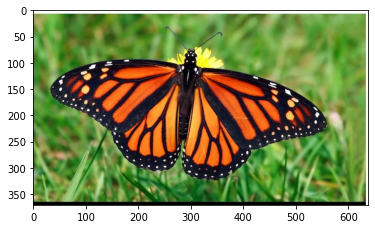

In [6]:
img = cv2.imread('monarch-butterfly-grass_4x3.jpg')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_copy)

In [7]:
pixel_val = img_copy.reshape((-1 ,3))
pixel_val = np.float32(pixel_val)

In [47]:
#define clustering data when to stop
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER , 10 ,1.0)
#k is the number of 
k= 3
retval , labels , centers = cv2.kmeans(pixel_val , k , None , criteria , 20 , cv2.KMEANS_RANDOM_CENTERS)
#convert data 
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#reshape data to original img demension
segmented_img = segmented_data.reshape(img_copy.shape)
labels_reshape = labels.reshape(img_copy.shape[0] , img_copy.shape[1])


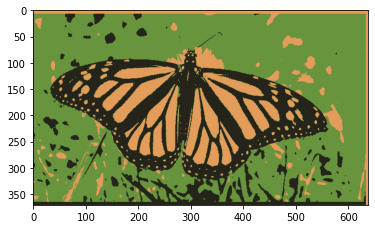

In [48]:
plt.imshow(segmented_img)

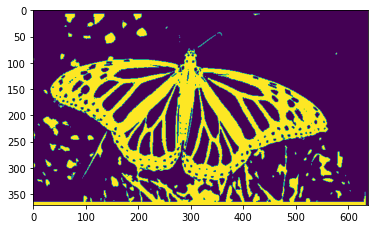

In [49]:
plt.imshow(labels_reshape ==1)

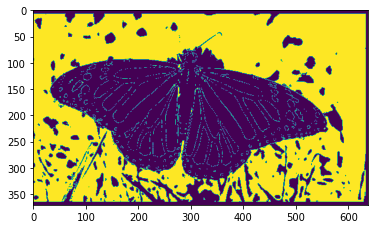

In [50]:
plt.imshow(labels_reshape ==2)

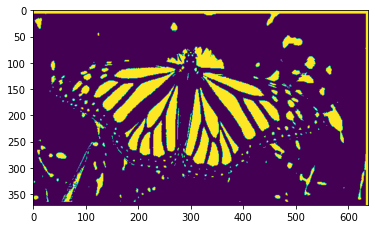

In [52]:
plt.imshow(labels_reshape ==0)

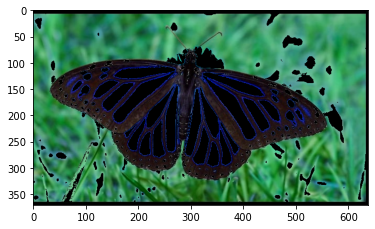

In [54]:
masked_img = np.copy(img)
masked_img[labels_reshape ==0] = [0,0,0]

plt.imshow(masked_img)